In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Number of training samples: 60000
Number of testing samples: 10000
Shape of an image: (28, 28)


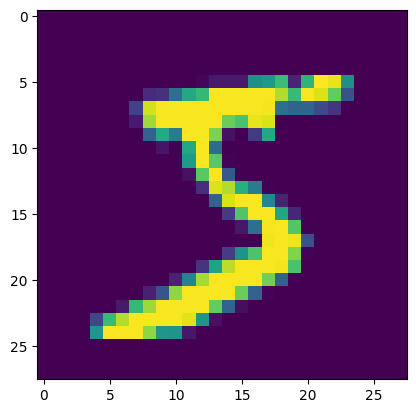

In [11]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Shape of an image:", X_train[0].shape)

plt.imshow(X_train[0])

In [12]:
print("Data preview BEFORE normalization: ")
print(X_train[0])

Data preview BEFORE normalization: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   

In [13]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

print("Data preview AFTER normalization: ")
print(X_train[0])

Data preview AFTER normalization: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [15]:
# Building the model
model = models.Sequential([
    layers.Conv2D(100, (3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Training the model
model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8524 - loss: 0.4658 - val_accuracy: 0.9726 - val_loss: 0.0867
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9729 - loss: 0.0873 - val_accuracy: 0.9793 - val_loss: 0.0722
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9825 - loss: 0.0556 - val_accuracy: 0.9802 - val_loss: 0.0687
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9846 - loss: 0.0472 - val_accuracy: 0.9834 - val_loss: 0.0506
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9879 - loss: 0.0368 - val_accuracy: 0.9840 - val_loss: 0.0557


In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy * 100:2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0729
Test accuracy: 98.400003%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


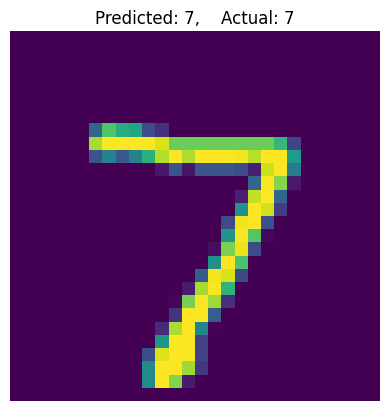

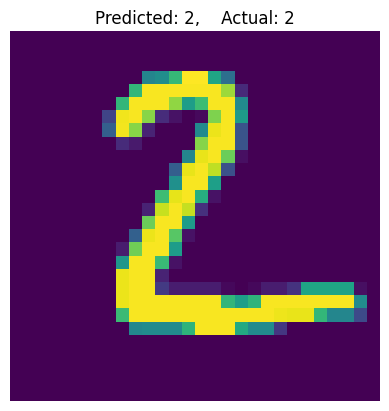

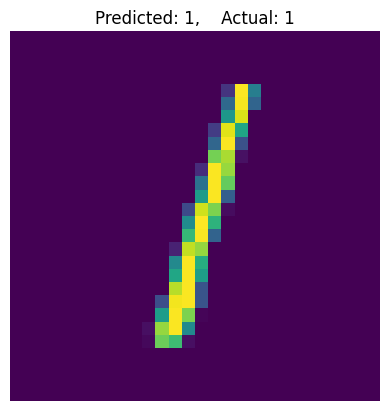

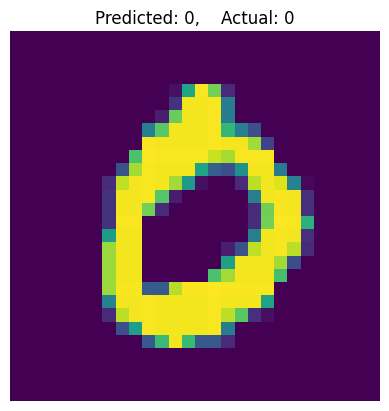

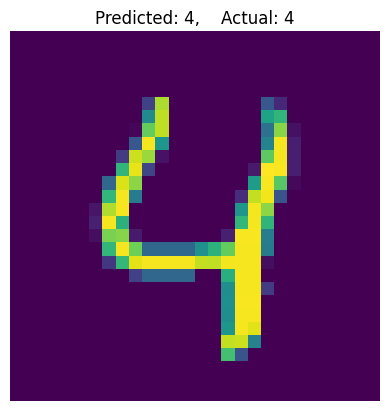

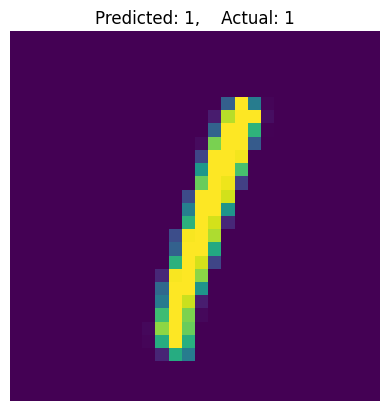

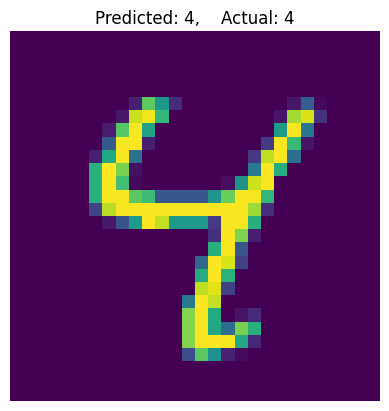

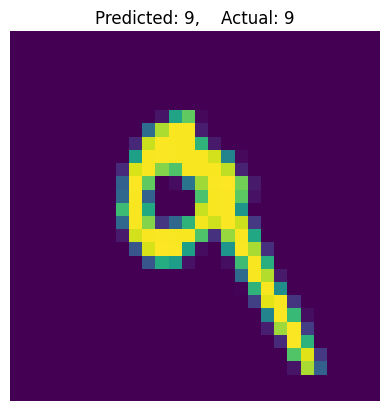

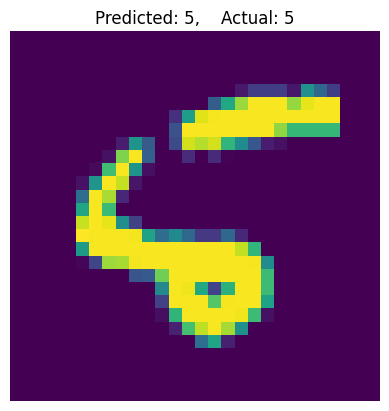

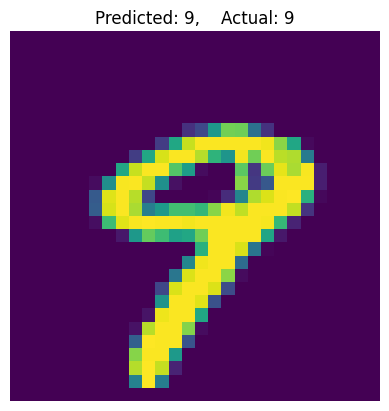

In [18]:
predictions = model.predict(X_test)
predicted_classes = [np.argmax(element) for element in predictions]


for index in range(10):
    plt.imshow(X_test[index])
    plt.title(f"Predicted: {predicted_classes[index]},    Actual: {Y_test[index]}")
    plt.axis("off")
    plt.show()